Проничкин Юрий к заданию С 

Логин в Я.контесте - ml1_2019_om69

In [10]:
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
def replace_nan_to_means(X):
    sred = np.nanmean(X,axis=0)
    mask = np.isnan(sred)
    sred[mask] = 0
    wherenan = np.where(np.isnan(X))
    X[wherenan] = sred[wherenan[1]]
    return X

In [12]:
def time_of_work(n):
    X = np.random.rand(n,n)
    Where_nan = np.random.randint(0,high=100,size=(int(n * n * 0.6)))
    np.put(X,Where_nan,np.nan)
    current_time = time.time()
    replace_nan_to_means(X)
    return time.time() - current_time

In [13]:
Time_list =[]
for i in range (100,1000,100):
    Time_list.append(time_of_work(i))

Text(0, 0.5, 'Time')

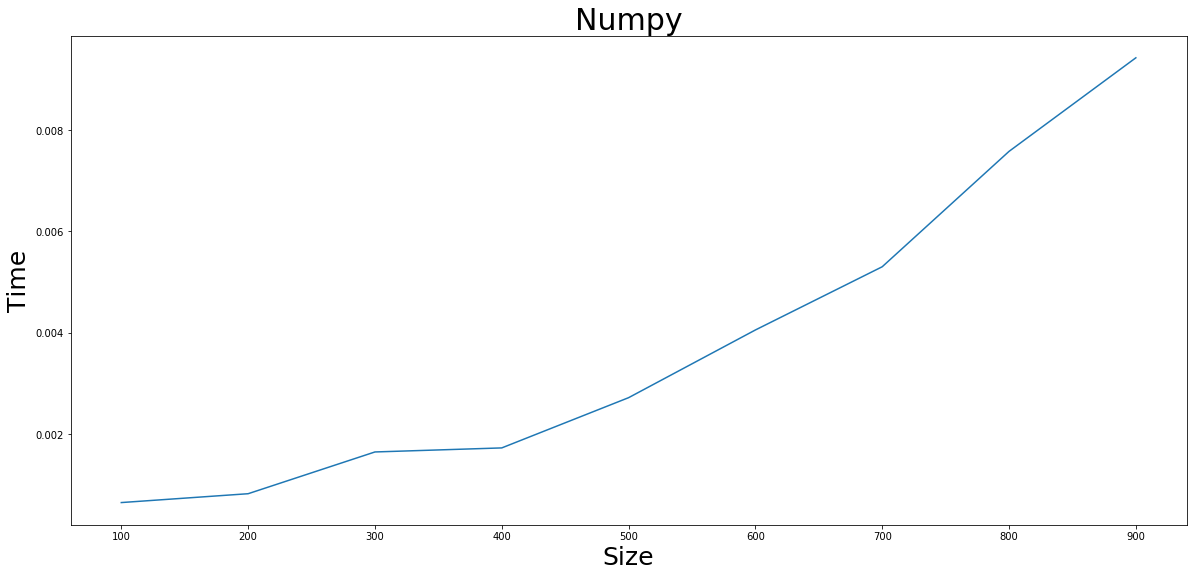

In [14]:
fig, ax = plt.subplots()

fig.set_figwidth(20)
fig.set_figheight(9)

plt.title('Numpy', fontsize=30)

plt.plot(range (100,1000,100),Time_list)

plt.xlabel('Size', fontsize=25)
plt.ylabel('Time', fontsize=25)

In [15]:
def replace_nan_to_means_loops_and_numpy(X):
    means = np.zeros(X.shape[1])
    count = np.zeros(X.shape[1])
    for row in X:
        for i, x in enumerate(row):
            if np.isnan(x) == False:
                means[i] += x
                count[i] += 1
    means /= count
    wherenan = np.where(np.isnan(X))
    X[wherenan] = means[wherenan[1]]
    return X

In [16]:
def time_of_work_ln(n):
    X = np.random.rand(n,n)
    Where_nan = np.random.randint(0,high=100,size=(int(n * n * 0.6)))
    np.put(X,Where_nan,np.nan)
    current_time = time.time()
    replace_nan_to_means_loops_and_numpy(X)
    return time.time() - current_time

In [17]:
Time_list_2 =[]
for i in range (100,1000,100):
    Time_list_2.append(time_of_work_ln(i))

Text(0, 0.5, 'Time')

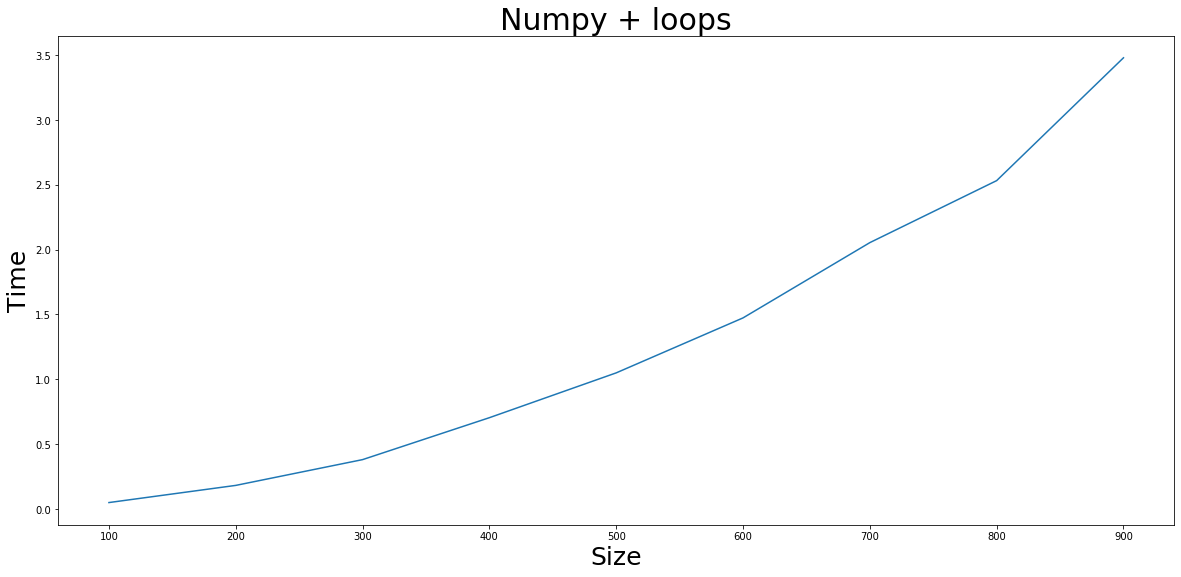

In [19]:
fig, ax = plt.subplots()

fig.set_figwidth(20)
fig.set_figheight(9)

plt.title('Numpy + loops', fontsize=30)

plt.plot(range (100,1000,100),Time_list_2)

plt.xlabel('Size', fontsize=25)
plt.ylabel('Time', fontsize=25)

In [26]:
def replace_nan_to_means_loops(X):
    means = np.zeros(X.shape[1])
    count = np.zeros(X.shape[1])
    for row in X:
        for i, x in enumerate(row):
            if np.isnan(x) == False:
                means[i] += x
                count[i] += 1
    means /= count
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            if np.isnan(X[i][j]) == True:
                X[i][j] = means[j]
    wherenan = np.where(np.isnan(X))
    X[wherenan] = means[wherenan[1]]
    return X

In [27]:
def time_of_work_l(n):
    X = np.random.rand(n,n)
    Where_nan = np.random.randint(0,high=100,size=(int(n * n * 0.6)))
    np.put(X,Where_nan,np.nan)
    current_time = time.time()
    replace_nan_to_means_loops(X)
    return time.time() - current_time

In [28]:
Time_list_3 =[]
for i in range (100,1000,100):
    Time_list_3.append(time_of_work_l(i))

Text(0, 0.5, 'Time')

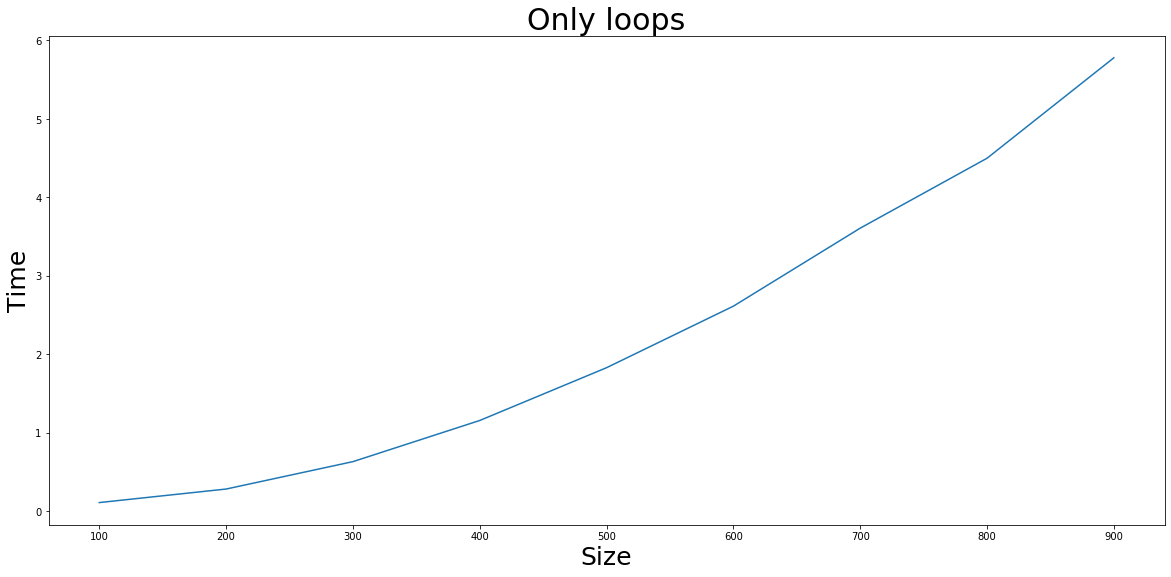

In [29]:
fig, ax = plt.subplots()

fig.set_figwidth(20)
fig.set_figheight(9)

plt.title('Only loops', fontsize=30)

plt.plot(range (100,1000,100),Time_list_3)

plt.xlabel('Size', fontsize=25)
plt.ylabel('Time', fontsize=25)

          Как видно из графиков зависимость времени от размера входных данных похожа на квадратичную вне зависимости от реализации, что и не удевительно ведь нам приходится пройтись по всем элементам массива. Больший интерес вызывает скорость работы - если в Numpy реализации она практически мгновенна на входных матрицах размером до 1000x1000 то реализация с использованием циклов уже занимает некторое время и медленнее numpy реализации примерно в 389 раз.Полностью цикловая реализация медленнее еще примерно в 2 раза , что и не удевительно ведь он медленно проходит матрицу дважды , тогда как смешанный алгоритм 1 раз медленно, второй раз быстро.
           Вывод очевиден, Numpy работает бысто - связано это, скорее всего с тем что написаны функции в numpy на более низкоуровневом языке C, имеющем более быстрый доступ к памяти, и реализованы в том числе с использованием технических возможностей процессора - грамотно используя кэш-память и устройства для работы с векторами.